In [2]:
#importing libraries and dataset
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [76]:
#visualizing the data but didnt work so i did it on excel 'each feature vs charges'
#import seaborn as sns
# age vs charge
#sns.jointplot(x=insurance['age'],y=insurance['charges'])


In [3]:
#converting nominal data to numerical
dummiessex=pd.get_dummies(df.sex)
dummiessex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [4]:
dummiessmoker=pd.get_dummies(df.smoker)
dummiessmoker

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [5]:
dummiesregion=pd.get_dummies(df.region)
dummiesregion

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [6]:
#merging the converted data with the original dataframe df
merged=pd.concat([df,dummiessex,dummiessmoker,dummiesregion],axis='columns')
merged


,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [7]:
#dropping duplicate columns
final=merged.drop(['sex','male','smoker','no','region'],axis='columns')
final


,age,bmi,children,charges,female,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1


In [8]:
#model creation step
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
model=LinearRegression()

In [10]:
#specifying x columns
x=final.drop('charges',axis='columns')
x

,age,bmi,children,female,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,1,0,0,0,1
1,18,33.770,1,0,0,0,0,1,0
2,28,33.000,3,0,0,0,0,1,0
3,33,22.705,0,0,0,0,1,0,0
4,32,28.880,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,0,0,0,1


In [11]:
#specifying y column
y=final.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [12]:
#spliting our data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30)

 

In [13]:
len(X_train) 

936

In [14]:
len(X_test) 


402

In [15]:
#fitting the model to the training set
model.fit(X_train,y_train)

LinearRegression()

In [16]:
#r^2
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7605730149382748


In [18]:
print('intercept:', model.intercept_)


intercept: -13495.769275534587


In [19]:
 print('slope:', model.coef_)

slope: [  261.67245004   348.873572     588.75926706   294.59131717
 23613.75190079   872.8734633   -186.07318717  -440.33052862
  -246.46974751]


In [20]:
#testing the model
y_pred = model.predict(X_test)
print('predicted response:', y_pred[0:10], sep='\n')


predicted response:
[ 1929.02990995  6594.1130835   6667.4866962   9909.83590112
  6216.9969885  30306.87455858 33276.39134916 25672.02047173
 40496.57465412  8427.09494053]


In [21]:
model.predict([[19,27.90,0,1,1,0,0,0,1]])

array([24871.45340433])

In [22]:
model.score(X_train,y_train)

0.7605730149382748

Text(0, 0.5, 'y predict')

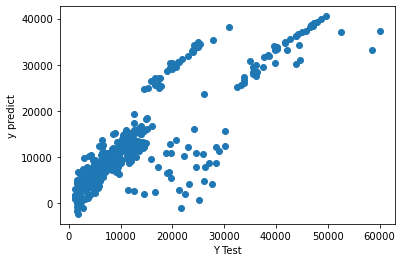

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('y predict')

In [24]:
#trying square order 

In [25]:
transformer = PolynomialFeatures(degree=2, include_bias=False)


In [26]:
transformer.fit(X_train)


PolynomialFeatures(include_bias=False)

In [27]:
x2 = transformer.transform(X_train)


In [28]:
#the new model


In [29]:
model = LinearRegression().fit(x2,y_train )


In [30]:
r_sq = model.score(x2, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8592147856144987


In [31]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X_test)
X_test2 = transformer.transform(X_test)

In [32]:
#y_pred = model.predict(X_test2) errrrroooorrrrrr!!

In [33]:
#trying order 3


In [34]:
x3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)


In [35]:
model = LinearRegression().fit(x3, y_train)


In [36]:
r_sq = model.score(x3, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8695208140234769


In [37]:
transformer = PolynomialFeatures(degree=3, include_bias=False)
transformer.fit(X_test)
X_test3 = transformer.transform(X_test)



In [38]:
y_pred = model.predict(X_test3)

In [39]:
print('predicted response:', y_pred[0:10], sep='\n')

predicted response:
[ 1273.3354252   7795.73674935  6215.99611062  9873.11956185
  5396.50903202 47289.7741591  43516.70549935 16526.48434281
 51013.596987    6214.14663465]


Text(0, 0.5, 'y predict')

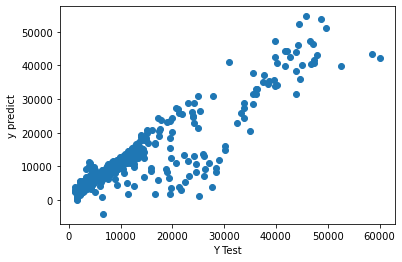

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('y predict')

In [41]:
r_sq = model.score(X_test3, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8042757460733999


In [ ]:
#bad